# ----------------------------------------------------------------------
# Supervised Learning - Logistic Regression
# ----------------------------------------------------------------------

## Building a Student Performace Prediction System


# Classification vs. Regression
The aim of this project is to predict how likely a student is to pass. Which type of supervised learning problem is this, classification or regression? Why?
Answer:
This project is a classification supervised learning problem because the variable to predict, i.e. if a student graduates or fails to graduate, is categorical. On this case this a dichotomous categorical variable where the only two possible values are "pass" or "fail".

### Overview:

1.Read the problem statement.

2.Get the dataset.

3.Explore the dataset.

4.Pre-processing of dataset.

5.Transform the dataset for building machine learning model.

6.Split data into train, test set.

7.Build Model.

8.Apply the model.

9.Evaluate the model.

10.Provide insights.

## Problem Statement 

Using Logistic Regression **predict the performance of student**. The classification goal is to predict whether the student will pass or fail.

## Dataset 

This data approach student achievement in secondary education of two Portuguese schools. The data attributes include student grades, demographic, social and school related features) and it was collected by using school reports and questionnaires. Two datasets are provided regarding the performance in Mathematics.

**Source:** https://archive.ics.uci.edu/ml/datasets/Student+Performance

# Exploring the Data - Reading the dataset file using pandas. Take care about the delimiter.


In [1]:
# To supress Warning messages
import warnings 
warnings.filterwarnings('ignore')
%matplotlib inline 
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from scipy.stats import zscore
import seaborn as sns
from sklearn import preprocessing
import matplotlib.pyplot as plt

In [2]:
# Read dataset using pandas
sd = pd.read_csv("students-data.csv", delimiter=";")

# Q1. Drop missing values
*Set the index name of the dataframe to **"number"**. Check sample of data to drop if any missing values are there.*
*Use .dropna() function to drop the NAs*

#### Answer:

In [3]:
#sd['number']=sd.index
#sd = sd.reset_index(drop=True)
#sd.drop('number',axis=1,inplace=True)
sd.index.names = ['number']
sd.head(10)

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
number,,,,,,,,,,,,,,,,,,,,,
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10
5,GP,M,16,U,LE3,T,4,3,services,other,...,5,4,2,1,2,5,10,15,15,15
6,GP,M,16,U,LE3,T,2,2,other,other,...,4,4,4,1,1,3,0,12,12,11
7,GP,F,17,U,GT3,A,4,4,other,teacher,...,4,1,4,1,1,1,6,6,5,6
8,GP,M,15,U,LE3,A,3,2,services,other,...,4,2,2,1,1,1,0,16,18,19


In [4]:
#sd.isna().values.any()
sd.isna().sum()

school        0
sex           0
age           0
address       0
famsize       0
Pstatus       0
Medu          0
Fedu          0
Mjob          0
Fjob          0
reason        0
guardian      0
traveltime    0
studytime     0
failures      0
schoolsup     0
famsup        0
paid          0
activities    0
nursery       0
higher        0
internet      0
romantic      0
famrel        0
freetime      0
goout         0
Dalc          0
Walc          0
health        0
absences      0
G1            0
G2            0
G3            0
dtype: int64


# Q2. Transform Data


*Print all the attribute names which are not numerical.*

**Hint:** check **select_dtypes()** and its **include** and **exclude** parameters.**

#### Answer:

In [5]:
Non_numeric_attr = sd.select_dtypes(include='object').columns.tolist()
#Non_numeric_attr = sd.select_dtypes(include='object').copy()
#Non_numeric_attr = sd.select_dtypes(include='object').columns
Non_numeric_attr

['school',
 'sex',
 'address',
 'famsize',
 'Pstatus',
 'Mjob',
 'Fjob',
 'reason',
 'guardian',
 'schoolsup',
 'famsup',
 'paid',
 'activities',
 'nursery',
 'higher',
 'internet',
 'romantic']

# Q3. Drop variables with less variance

*Find the variance of each numerical independent variable and drop whose variance is less than 1. Use .var function to check the variance*

#### Answer:

In [6]:
sd.var()

age            1.628285
Medu           1.198445
Fedu           1.184180
traveltime     0.486513
studytime      0.704324
failures       0.553017
famrel         0.803997
freetime       0.997725
goout          1.239388
Dalc           0.793420
Walc           1.658678
health         1.932944
absences      64.049541
G1            11.017053
G2            14.148917
G3            20.989616
dtype: float64

In [7]:
sd.drop(sd.var()[sd.var() < 1].index.values, axis=1,inplace=True)
sd.columns

Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'schoolsup', 'famsup', 'paid',
       'activities', 'nursery', 'higher', 'internet', 'romantic', 'goout',
       'Walc', 'health', 'absences', 'G1', 'G2', 'G3'],
      dtype='object')

#### Variables with less variance are almost same for all the records. Hence, they do not contribute much for classification.

# Q4. Encode all categorical variables to numerical

Take the list of categorical attributes(from the above result) and convert them into neumerical variables. After that, print the head of dataframe and check the values.

**Hint:** check **sklearn LabelEncoder()**

#### Answer:

In [8]:
for col in Non_numeric_attr:
    sd[col]=preprocessing.LabelEncoder().fit_transform(sd[col])
sd.head(10)

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,higher,internet,romantic,goout,Walc,health,absences,G1,G2,G3
number,,,,,,,,,,,,,,,,,,,,,
0,0,0,18,1,0,0,4,4,0,4,...,1,0,0,4,1,3,6,5,6,6
1,0,0,17,1,0,1,1,1,0,2,...,1,1,0,3,1,3,4,5,5,6
2,0,0,15,1,1,1,1,1,0,2,...,1,1,0,2,3,3,10,7,8,10
3,0,0,15,1,0,1,4,2,1,3,...,1,1,1,2,1,5,2,15,14,15
4,0,0,16,1,0,1,3,3,2,2,...,1,0,0,2,2,5,4,6,10,10
5,0,1,16,1,1,1,4,3,3,2,...,1,1,0,2,2,5,10,15,15,15
6,0,1,16,1,1,1,2,2,2,2,...,1,1,0,4,1,3,0,12,12,11
7,0,0,17,1,0,0,4,4,2,4,...,1,0,0,4,1,1,6,6,5,6
8,0,1,15,1,1,0,3,2,3,2,...,1,1,0,2,1,1,0,16,18,19


# Q5. Convert the continuous values of grades into classes 

*Consider the values in G1, G2 and G3 with >= 10 as pass(1) and < 10 as fail(0) and encode them into binary values. Print head of dataframe to check the values.*

#### Answer:

In [9]:
sd['G1'] = pd.cut(sd.G1,
                     bins=[-1, 10, 100],
                     labels=["fail","pass"])

In [10]:
sd['G2'] = pd.cut(sd.G2,
                     bins=[-1, 10, 100],
                     labels=["fail","pass"])

In [11]:
sd['G3'] = pd.cut(sd.G3,
                     bins=[-1, 10, 100],
                     labels=["fail","pass"])

In [12]:
sd.head(10)

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,higher,internet,romantic,goout,Walc,health,absences,G1,G2,G3
number,,,,,,,,,,,,,,,,,,,,,
0,0,0,18,1,0,0,4,4,0,4,...,1,0,0,4,1,3,6,fail,fail,fail
1,0,0,17,1,0,1,1,1,0,2,...,1,1,0,3,1,3,4,fail,fail,fail
2,0,0,15,1,1,1,1,1,0,2,...,1,1,0,2,3,3,10,fail,fail,fail
3,0,0,15,1,0,1,4,2,1,3,...,1,1,1,2,1,5,2,pass,pass,pass
4,0,0,16,1,0,1,3,3,2,2,...,1,0,0,2,2,5,4,fail,fail,fail
5,0,1,16,1,1,1,4,3,3,2,...,1,1,0,2,2,5,10,pass,pass,pass
6,0,1,16,1,1,1,2,2,2,2,...,1,1,0,4,1,3,0,pass,pass,pass
7,0,0,17,1,0,0,4,4,2,4,...,1,0,0,4,1,1,6,fail,fail,fail
8,0,1,15,1,1,0,3,2,3,2,...,1,1,0,2,1,1,0,pass,pass,pass


In [13]:
sd.isna().sum()

school        0
sex           0
age           0
address       0
famsize       0
Pstatus       0
Medu          0
Fedu          0
Mjob          0
Fjob          0
reason        0
guardian      0
schoolsup     0
famsup        0
paid          0
activities    0
nursery       0
higher        0
internet      0
romantic      0
goout         0
Walc          0
health        0
absences      0
G1            0
G2            0
G3            0
dtype: int64

In [14]:
sd['G1']=preprocessing.LabelEncoder().fit_transform(sd['G1'])
sd['G2']=preprocessing.LabelEncoder().fit_transform(sd['G2'])
sd['G3']=preprocessing.LabelEncoder().fit_transform(sd['G3'])

In [15]:
sd.head(10)

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,higher,internet,romantic,goout,Walc,health,absences,G1,G2,G3
number,,,,,,,,,,,,,,,,,,,,,
0,0,0,18,1,0,0,4,4,0,4,...,1,0,0,4,1,3,6,0,0,0
1,0,0,17,1,0,1,1,1,0,2,...,1,1,0,3,1,3,4,0,0,0
2,0,0,15,1,1,1,1,1,0,2,...,1,1,0,2,3,3,10,0,0,0
3,0,0,15,1,0,1,4,2,1,3,...,1,1,1,2,1,5,2,1,1,1
4,0,0,16,1,0,1,3,3,2,2,...,1,0,0,2,2,5,4,0,0,0
5,0,1,16,1,1,1,4,3,3,2,...,1,1,0,2,2,5,10,1,1,1
6,0,1,16,1,1,1,2,2,2,2,...,1,1,0,4,1,3,0,1,1,1
7,0,0,17,1,0,0,4,4,2,4,...,1,0,0,4,1,1,6,0,0,0
8,0,1,15,1,1,0,3,2,3,2,...,1,1,0,2,1,1,0,1,1,1


# Q6. Consider G3 is the target attribute and remaining all attributes as features to predict G3. Now, separate features and target into separate dataframes and name them X and y respectively.

#### Answer:

In [16]:
X = sd.drop("G3", axis=1)
y = sd["G3"]

## Visualization

# Q7. Plot G2 and G3 and give your understanding on relation between both variables.

### Hint: Use pd.crosstab(sd.G2,sd.G3).plot(kind='bar')

#### Answer:

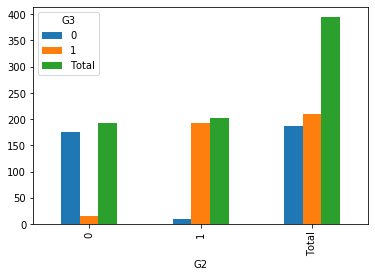

In [17]:
pd.crosstab(sd.G2,sd.G3,margins=True, margins_name="Total").plot(kind='bar')

In [18]:
pd.crosstab(sd.G2,sd.G3)

G3,0,1
G2,,
0,176,16
1,10,193


In [19]:
#From the above plot we can say that G2 is a good predictor of G3

# Q8. Plot the number of students in each school and number of students with different ages in separate plots.

### Hint: use seaborn sns.countplot()

#### Answer:

In [20]:
import seaborn as sns

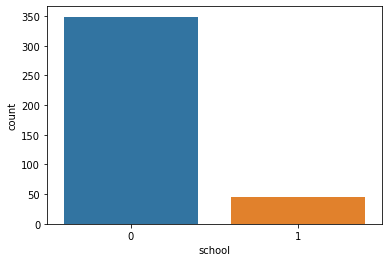

In [21]:
sns.countplot(x='school',data=sd)

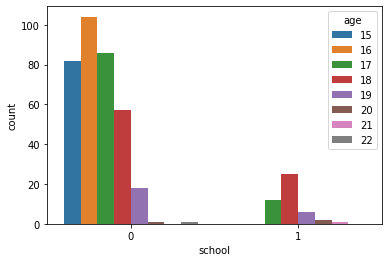

In [22]:
sns.countplot(x='school',hue='age',data=sd)

# Q9. Training and testing data split

 *So far, you have converted all categorical features into numeric values. Now, split the data into training and test sets with training size of 300 records. Print the number of train and test records.*

**Hint:** check **train_test_split()** from **sklearn**

#### Answer:

In [23]:
test_size = 95 # taking 300 & 95 as training and test set sizes
seed = 7  # Random numbmer seeding for reapeatability of the code
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=seed)

In [24]:
X_train.shape

(300, 26)

In [25]:
X_test.shape

(95, 26)

# Q10. - Model Implementation and Testing the Accuracy

*Build a **LogisticRegression** classifier using **fit()** functions in sklearn. 
* You need to import both Logistic regression and accuracy score from sklearn*

#### Answer:

In [26]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score

In [27]:
model = LogisticRegression()

In [28]:
model.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [29]:
y_pred = model.predict(X_train)

In [30]:
f1_score(y_train,y_pred)

0.9387755102040818

In [31]:
y_predt = model.predict(X_test)

In [32]:
f1_score(y_test,y_predt)

0.9333333333333333

In [33]:
accuracy_score(y_train,y_pred)

0.94

In [34]:
accuracy_score(y_test,y_predt)

0.9157894736842105

# ----------------------------------------------------------------------
# Supervised Leaning - Naive Bayes with Iris Data
# ----------------------------------------------------------------------

In [35]:
#Load all required library
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
from sklearn import datasets
from sklearn.decomposition import PCA
from sklearn.naive_bayes import GaussianNB, BernoulliNB, MultinomialNB

### Import Iris.csv

In [36]:
# Load using input file
iris=pd.read_csv("Iris.csv")
iris.head(5)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


### Treat NaN's/ Null values found

In [37]:
iris=iris.fillna(0)

### Slice  Iris data set for Independent variables and dependent variables

#### Please note 'Species' is your dependent variable, name it y and independent set data as X

In [38]:
X=iris.iloc[:,:4].values
y=iris['Species'].values

In [39]:
#Check the dataset
print(y)
print(X)

['Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa'
 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa'
 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa'
 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa'
 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa'
 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa'
 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa'
 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa'
 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa'
 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa'
 'Iris-versicolor' 'Iris-versicolor' 'Iris-versicolor' 'Iris-versicolor'
 'Iris-versicolor' 'Iris-versicolor' 'Iris-versicolor' 'Iris-versicolor'
 'Iris-versicolor' 'Iris-versicolor' 'Iris-versicolor' 'Iris-versicolor'
 'Iris-versicolor' 'Iris-versicolor' 'Iris-versicolor' 'Iris-versicolor

# Q1.  Find the distribution of target variable (Species) and, Plot the distribution of target variable using histogram

In [40]:
iris.groupby('Species').count()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
Species,,,,,
Iris-setosa,50,50,50,50,50
Iris-versicolor,50,50,50,50,50
Iris-virginica,52,52,52,52,52


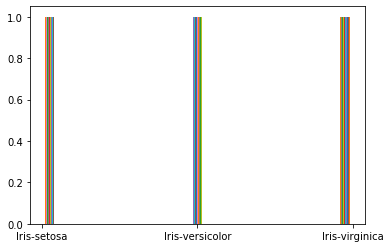

In [41]:
plt.hist(iris['Species'], bins='auto')
plt.show()

In [42]:
# Drop Id variable from data

In [43]:
iris.drop('Id',axis=1,inplace=True)

In [44]:
iris.head(10)

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
5,5.4,3.9,1.7,0.4,Iris-setosa
6,4.6,3.4,1.4,0.3,Iris-setosa
7,5.0,3.4,1.5,0.2,Iris-setosa
8,4.4,2.9,1.4,0.2,Iris-setosa
9,4.9,3.1,1.5,0.1,Iris-setosa


# Q2. Find Correlation among all variables and give your insights 

In [45]:
iris.corr()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
SepalLengthCm,1.000000,0.145802,0.816560,0.668652
SepalWidthCm,0.145802,1.000000,-0.167316,-0.246073
PetalLengthCm,0.816560,-0.167316,1.000000,0.936151
PetalWidthCm,0.668652,-0.246073,0.936151,1.000000


In [46]:
#We see that the PetalWidth and PetalLength are highly correlated. Also, SepalLength and PetalLength are related.

### Split data in Training and test set in 80:20.

In [47]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=7)

# Q3. Feature Scaling on X_Train and X_Test

In [48]:
# Use StandardScaler or similar methods
from sklearn.preprocessing import StandardScaler 

In [49]:
sc = StandardScaler() 

In [50]:
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

# Q4. Train and Fit NaiveBayes Model

In [51]:
#Fit the model
model = GaussianNB()
model.fit(X_train, y_train)
print(model)

GaussianNB(priors=None, var_smoothing=1e-09)


In [52]:
#Predict
predicted = model.predict(X_test)

# Q5.  Print Accuracy and Confusion Matrix and Conclude your findings

In [53]:
# show Confusion Matrix
from sklearn.metrics import confusion_matrix

In [54]:
confusion_matrix(predicted, y_test)

array([[ 8,  0,  0],
       [ 0, 10,  1],
       [ 0,  0, 12]])

In [55]:
# show accuracy
from sklearn.metrics import accuracy_score

In [56]:
y_pred = model.predict(X_train)

In [57]:
accuracy_score(y_train,y_pred)

0.9834710743801653

In [58]:
accuracy_score(y_test,predicted)

0.967741935483871

In [59]:
#Show precision and Recall metrics
from sklearn import metrics

In [60]:
metrics.recall_score(y_test,predicted, average='weighted')

0.967741935483871

In [61]:
metrics.precision_score(y_test,predicted, average='weighted')

0.970674486803519

In [62]:
#High scores for both show that the classifier is returning accurate results (high precision), 
#as well as returning a majority of all positive results (high recall).